## Problem Statement:

Develop a machine learning model to predict the selling price of used cars based on various attributes such as the car's make and model, its year of manufacture, its present market price, the number of kilometers it has been driven, fuel type, selling type, transmission type, and the number of previous owners. The goal is to create an accurate prediction model that can assist sellers and buyers in estimating the selling price of a used car.

In [1]:
# required importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data set
df=pd.read_csv(r"C:\Users\Maruthipadala\Downloads\archive (9).zip")

In [3]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [4]:
df.shape # shape of data set

(301, 9)

In [5]:
df.isnull().sum() # checking for null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.duplicated().sum() # checking for duplicate values

2

In [7]:
df.drop_duplicates(inplace=True)  # dropping duplicate values


In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes  # checking data types

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [10]:
df.value_counts('Car_Name')

Car_Name
city                      26
corolla altis             16
verna                     14
brio                      10
fortuner                  10
                          ..
Hero Passion X pro         1
Hero Hunk                  1
camry                      1
Hero Honda Passion Pro     1
800                        1
Length: 98, dtype: int64

In [11]:
df.value_counts('Fuel_Type')

Fuel_Type
Petrol    239
Diesel     58
CNG         2
dtype: int64

In [12]:
df.value_counts('Fuel_Type',normalize=True)

Fuel_Type
Petrol    0.799331
Diesel    0.193980
CNG       0.006689
dtype: float64

In [13]:
df.value_counts('Selling_type')

Selling_type
Dealer        193
Individual    106
dtype: int64

In [14]:
df.value_counts('Transmission')

Transmission
Manual       260
Automatic     39
dtype: int64

In [15]:
df.value_counts('Owner')

Owner
0    288
1     10
3      1
dtype: int64

In [16]:
df[df['Owner'] == 3]  # no of owners==3

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


## EDA(Exploratory Data Analysis)

<AxesSubplot:xlabel='Owner', ylabel='count'>

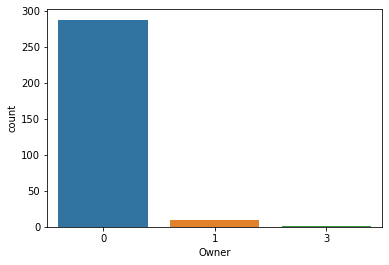

In [17]:
sns.countplot(data=df,x='Owner')

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

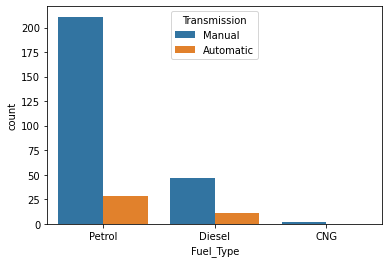

In [18]:
sns.countplot(data=df,x='Fuel_Type',hue='Transmission')

<AxesSubplot:xlabel='Selling_type', ylabel='count'>

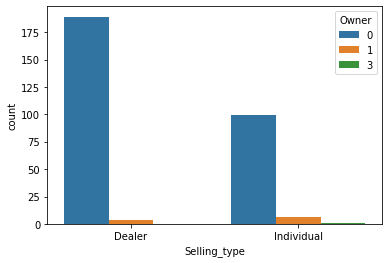

In [19]:
sns.countplot(data=df,x='Selling_type',hue='Owner')

In [20]:
df[df['Driven_kms']>= 300000]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [21]:
df.drop(196,inplace=True)  # dropping the row where car_name is Activa 3g it is looks like outlier 

In [22]:
df[df['Driven_kms']>= 300000]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


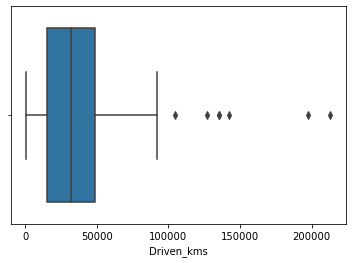

In [23]:
sns.boxplot(x=df['Driven_kms'])
plt.show()

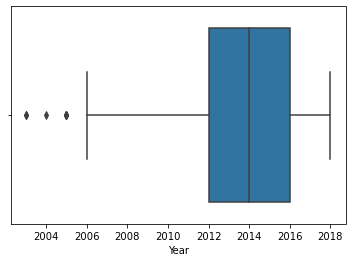

In [24]:
sns.boxplot(x=df['Year'])
plt.show()

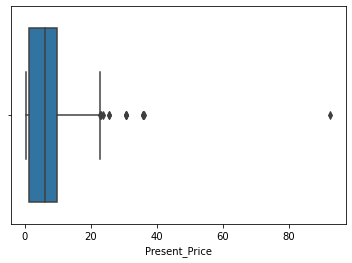

In [25]:
sns.boxplot(x=df['Present_Price'])
plt.show()

In [26]:
df[df['Present_Price']>= 80.0]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [27]:
df.drop(columns='Car_Name',inplace=True)   # dropping the column_name car_name it is unnecessary column 

In [28]:
# creating the new column
df['current_year']=2023  # first we create the column current_year == 2023
df['No_of_years']=df['current_year']-df['Year']   # creating the another column No_of_years to saw the difference between year and current_year 
#Create new features that may capture meaningful information


df.drop(columns=['Year','current_year'],inplace=True)  # dropping the 

In [29]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


<AxesSubplot:xlabel='No_of_years', ylabel='Selling_Price'>

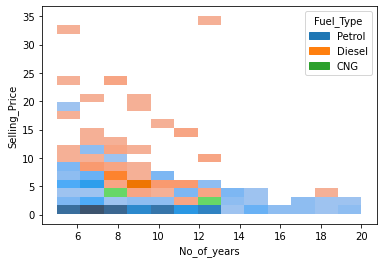

In [30]:
sns.histplot(data=df,x='No_of_years',y='Selling_Price',hue='Fuel_Type')

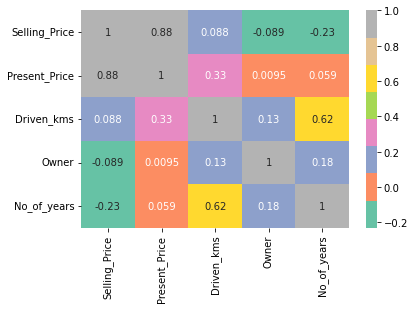

In [31]:
# correlation
sns.heatmap(df.corr(), annot=True, cmap='Set2')
plt.show()

In [32]:
df=(pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission']))
df

,Selling_Price,Present_Price,Driven_kms,Owner,No_of_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,9,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,10,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,6,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,12,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,9,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,8,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,14,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,6,0,1,0,1,0,0,1


In [33]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,No_of_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,9,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,10,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,6,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,12,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,9,0,1,0,1,0,0,1


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x=df.drop(columns='Selling_Price')
y=df['Selling_Price']

In [36]:
# Divide the Data into train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [37]:
x_train.head()

,Present_Price,Driven_kms,Owner,No_of_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
286,7.90,28569,0,7,0,0,1,1,0,0,1
82,25.39,15000,0,6,0,1,0,1,0,1,0
110,1.78,6000,0,7,0,0,1,0,1,0,1
170,0.83,5500,0,11,0,0,1,0,1,0,1
222,7.60,77632,0,9,0,1,0,1,0,0,1


In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(238, 11)
(60, 11)
(238,)
(60,)


In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler

In [40]:
# Create a StandardScaler instance for the training data and fit it
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

# Use the same scaler to transform the testing data
x_test = sc.transform(x_test)


In [41]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score,mean_squared_error

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=2)

In [43]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred_train=knn.predict(x_train)
knn_score=r2_score(y_test,y_pred)
knn_train_score=r2_score(y_train,y_pred_train)
print('KNN Test score:',knn_score)
print('KNN train score:',knn_train_score)
pd.DataFrame({'test':y_test,'predicted':y_pred}).head()

KNN Test score: 0.8829772677645882
KNN train score: 0.9684464353815829


,test,predicted
113,1.15,0.550
177,0.35,0.415
12,7.50,6.675
221,4.50,5.275
208,7.90,6.075


In [44]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor

In [45]:
# Create a RandomForestRegressor instance
rf = RandomForestRegressor()

# Fit the model using your training data
rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(x_test)

# Make predictions on the training data (optional, for evaluation)
y_pred_train = rf.predict(x_train)
rf_score=r2_score(y_test,y_pred)
rf_train_score=r2_score(y_train,y_pred_train)
print('Test score:',rf_score)
print('Train score:',rf_train_score)
pd.DataFrame({'test':y_test,'predicted':y_pred}).head()


Test score: 0.9042608425814003
Train score: 0.9802814020548627


,test,predicted
113,1.15,1.1004
177,0.35,0.4406
12,7.50,7.1015
221,4.50,4.0260
208,7.90,6.6195


In [46]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)
dr_score=r2_score(y_test,y_pred)
print(dr_score)
df1=pd.DataFrame({'test':y_test,'predicted':y_pred})
df1.head()


0.8955812232105966


,test,predicted
113,1.15,1.10
177,0.35,0.50
12,7.50,5.95
221,4.50,3.75
208,7.90,6.00


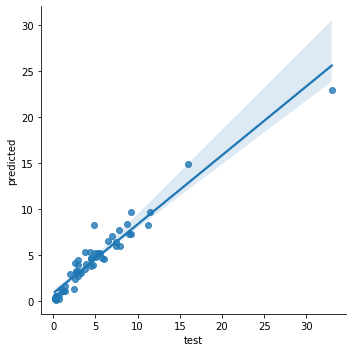

In [47]:
sns.lmplot(data=df1,x='test',y="predicted")

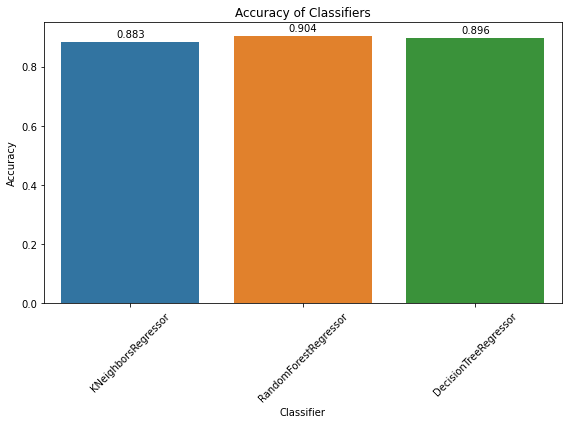

In [48]:
# Classifier names

x = ['KNeighborsRegressor','RandomForestRegressor', 'DecisionTreeRegressor']

# Corresponding accuracies
y = [knn_score,rf_score, dr_score]

# Plotting the bar plot with values on top
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=x, y=y)
# Displaying the values on top of the bars
for i, v in enumerate(y):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifiers')
plt.tight_layout()
plt.show()